<a href="https://colab.research.google.com/github/Folasewa/ML_Projects_WIDS/blob/main/Week1_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_set = pd.read_csv("/content/IRIS.csv")

In [6]:
data_set.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data_set.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#descriptive statatics
data_set.describe()



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data_set['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

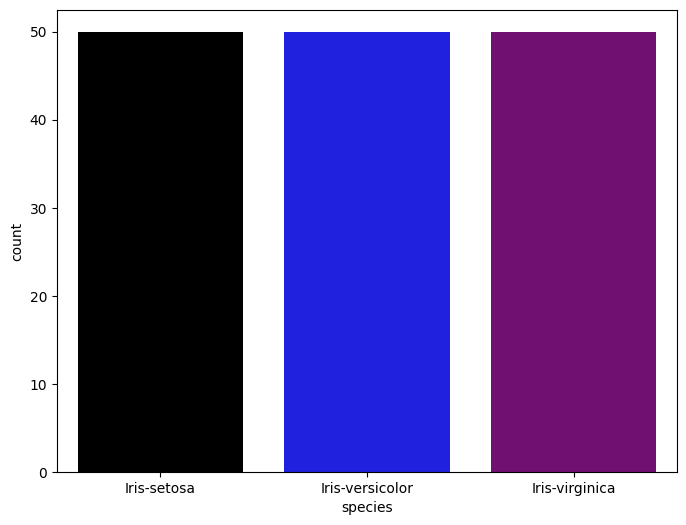

In [10]:
#using seaborn for visualizations
import seaborn as sns
colors = ["Black", "Blue", "Purple"]
plt.figure(figsize = (8,6))
sns.countplot(x = "species", data = data_set, palette = colors)
plt.show()

<Axes: >

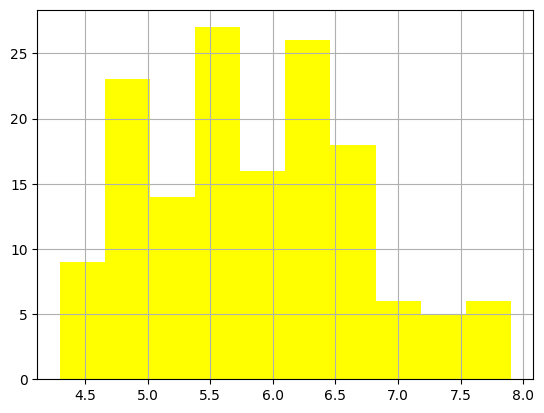

In [11]:
#visualizing each column names
data_set['sepal_length'].hist(color="yellow")

<Axes: >

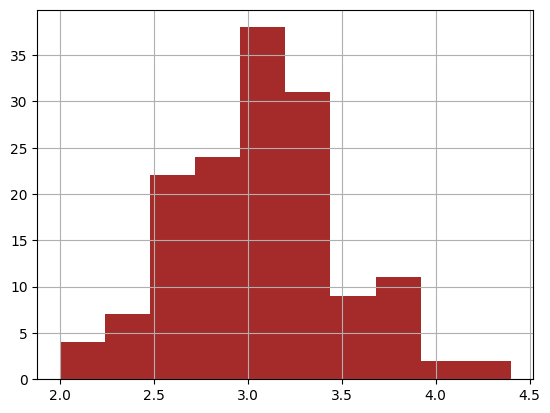

In [12]:
data_set['sepal_width'].hist(color = "brown")

<Axes: >

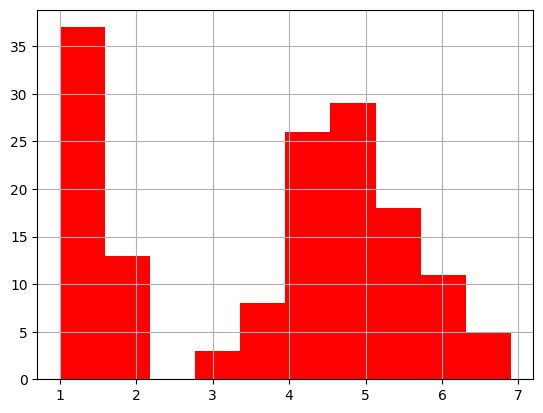

In [13]:
data_set['petal_length'].hist(color="red")

<Axes: >

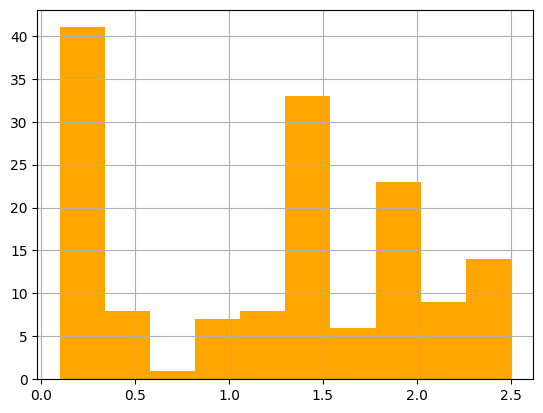

In [14]:
data_set['petal_width'].hist(color='orange')

<Axes: xlabel='species', ylabel='sepal_length'>

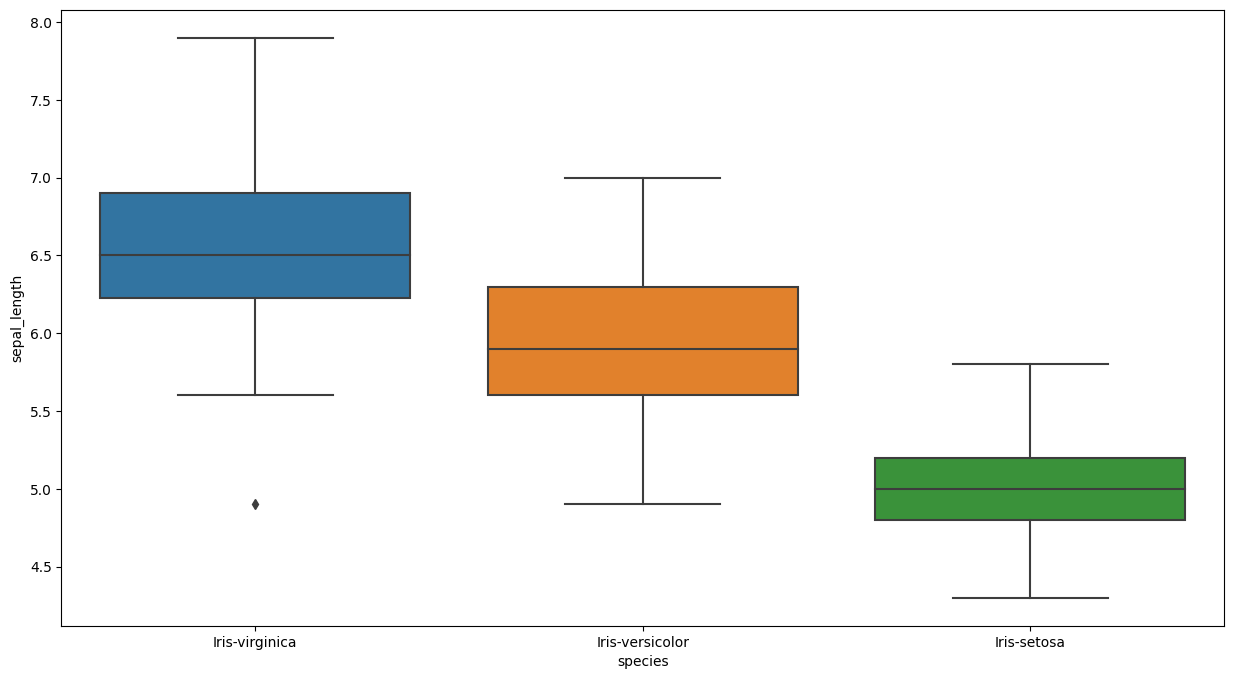

In [15]:
#finding relationships between the variables

#correlation between sepal length and species
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=data_set.sort_values('sepal_length',ascending=False))


<Axes: xlabel='species', ylabel='sepal_width'>

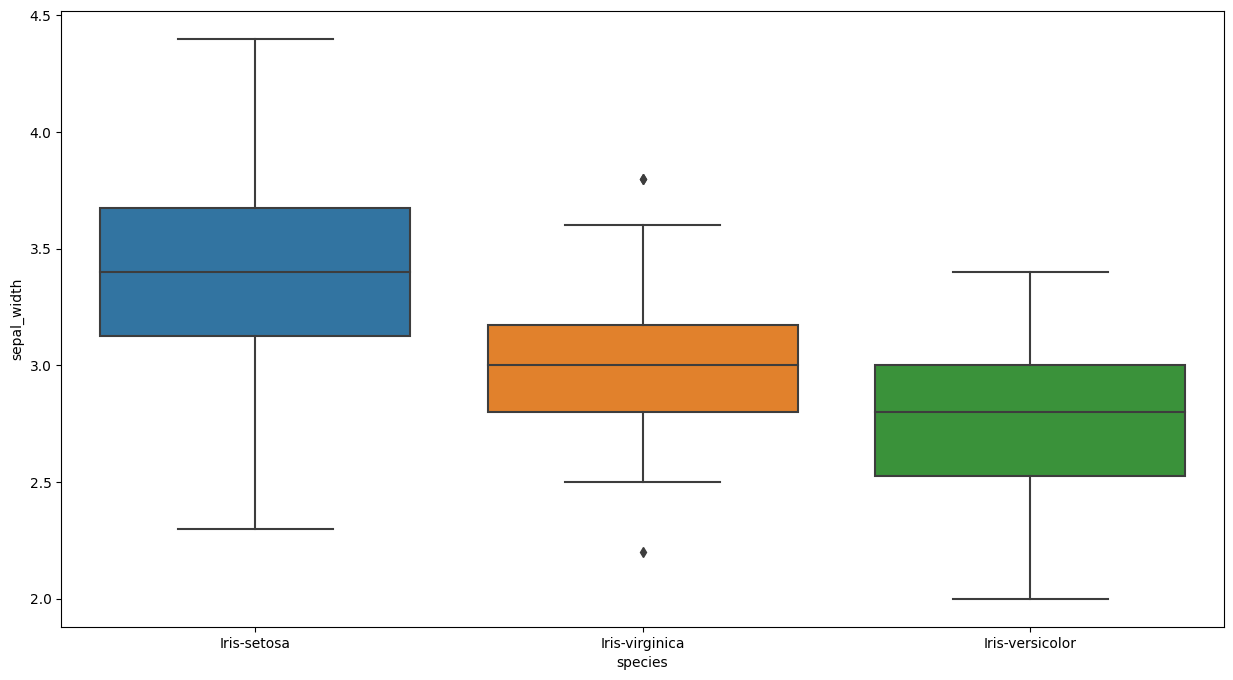

In [16]:
#correlation between sepal width and species

plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_width',data=data_set.sort_values('sepal_width',ascending=False))

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

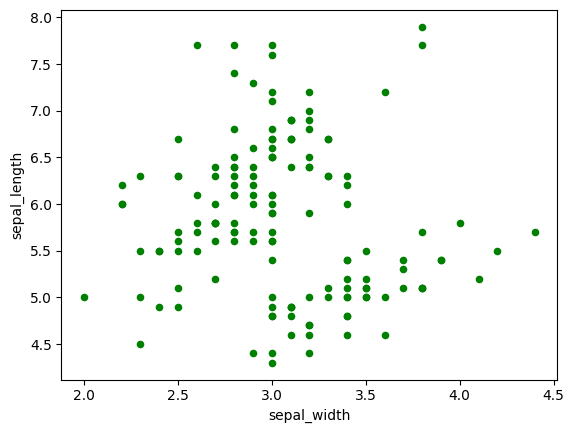

In [17]:
#relationship between sepal length and sepal width
data_set.plot(kind='scatter', x='sepal_width',y='sepal_length' , c='green')

<Axes: xlabel='petal_width', ylabel='petal_length'>

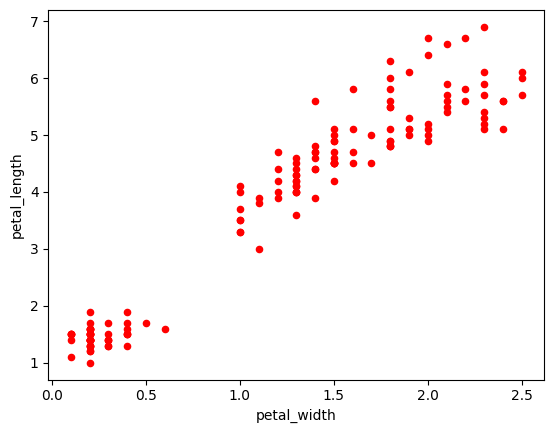

In [18]:
#relationship between petal length and petal width
data_set.plot(kind='scatter', x='petal_width',y='petal_length' , c='red')

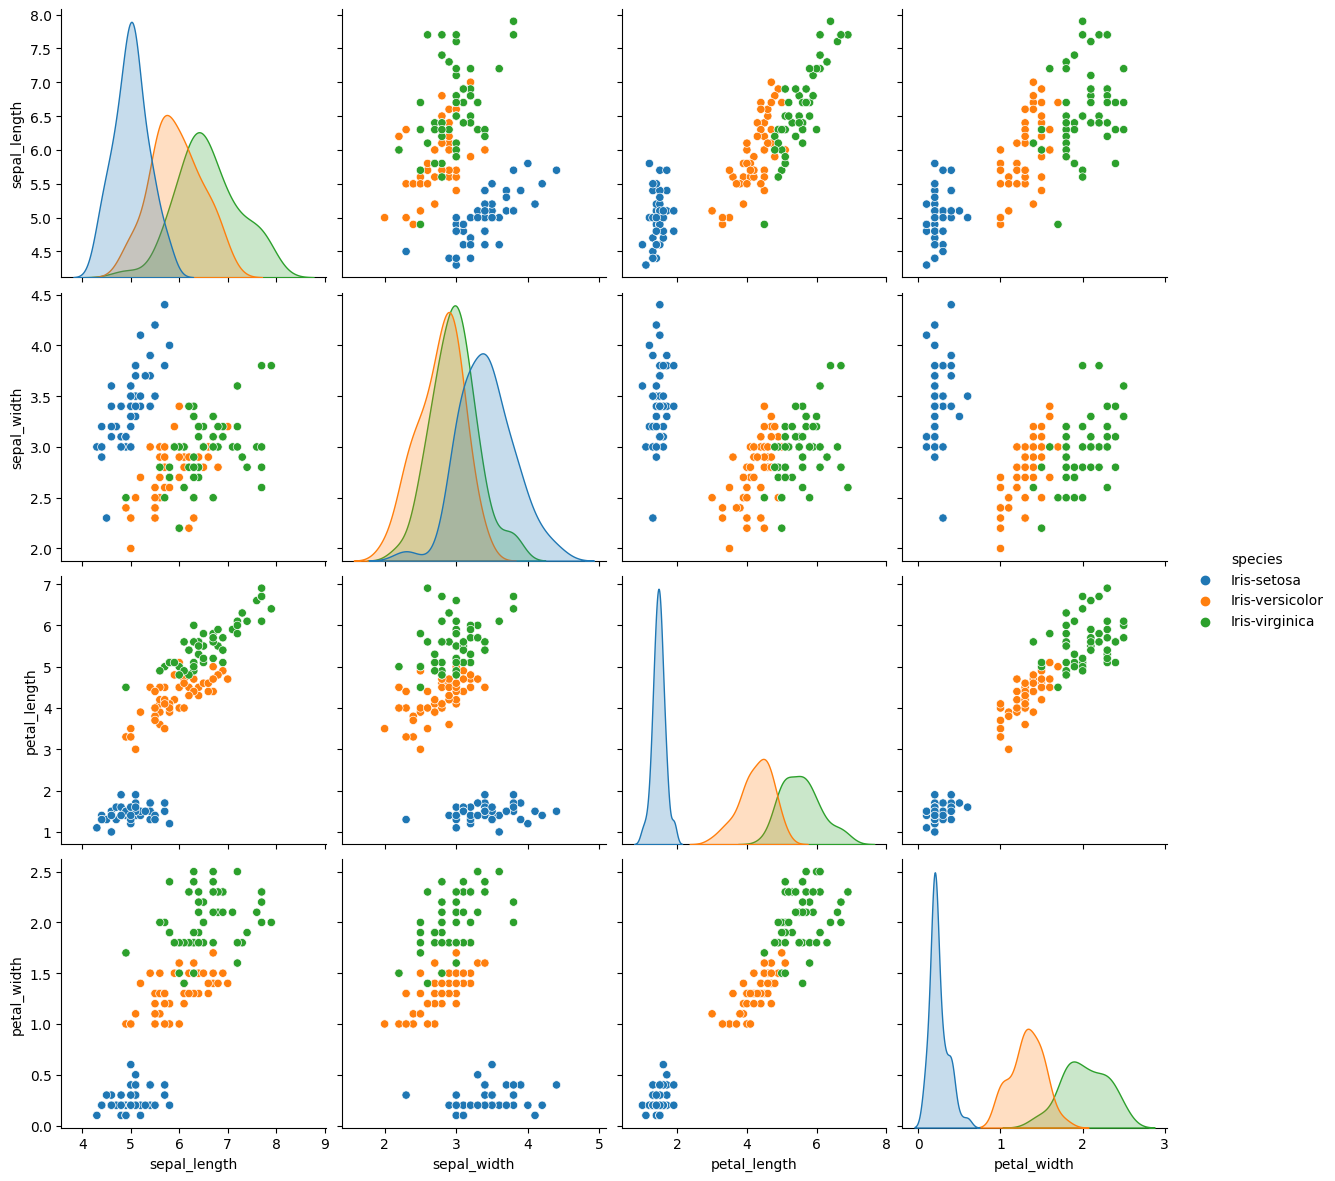

In [19]:
#creating a pairplot with seaborn
sns.pairplot(data_set, hue='species', height = 3)

In [20]:
#computing the correlation matrix

encoded_data = pd.get_dummies(data_set, columns=['species'])

# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                         sepal_length  sepal_width  petal_length  petal_width  \
sepal_length                 1.000000    -0.109369      0.871754     0.817954   
sepal_width                 -0.109369     1.000000     -0.420516    -0.356544   
petal_length                 0.871754    -0.420516      1.000000     0.962757   
petal_width                  0.817954    -0.356544      0.962757     1.000000   
species_Iris-setosa         -0.717416     0.595601     -0.922688    -0.887510   
species_Iris-versicolor      0.079396    -0.464700      0.201587     0.118376   
species_Iris-virginica       0.638020    -0.130901      0.721102     0.769134   

                         species_Iris-setosa  species_Iris-versicolor  \
sepal_length                       -0.717416                 0.079396   
sepal_width                         0.595601                -0.464700   
petal_length                       -0.922688                 0.201587   
petal_width                        -0.887510               

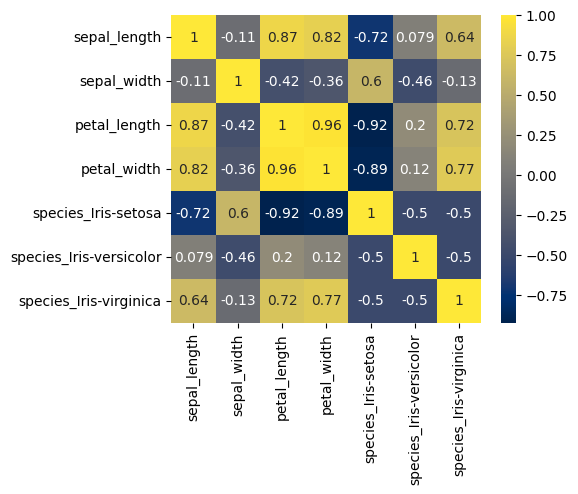

In [21]:
#creating a heatmap


fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap='cividis')

# Show the plot
plt.show()

In [25]:
#model building

from sklearn.model_selection import train_test_split
X=data_set.drop(columns=['species'])
Y=data_set['species']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#using KNearest

from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,Y_train)
acc_knn = model2.score(X_test, Y_test)*100
print("Accuracy (KNN): ",acc_knn)

Accuracy (KNN):  97.77777777777777


In [27]:
#using logistic regression

from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, Y_train)
acc_logreg = model3.score(X_test, Y_test)*100
print("Accuracy (LoR): ",acc_logreg)

Accuracy (LoR):  97.77777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,Y_train)
acc_rfc=model3.score(X_test,Y_test)*100
print("Accuracy (Random Forest Classifier): ",acc_rfc)

Accuracy (Random Forest Classifier):  97.77777777777777


<Axes: xlabel='Accuracy', ylabel='Models'>

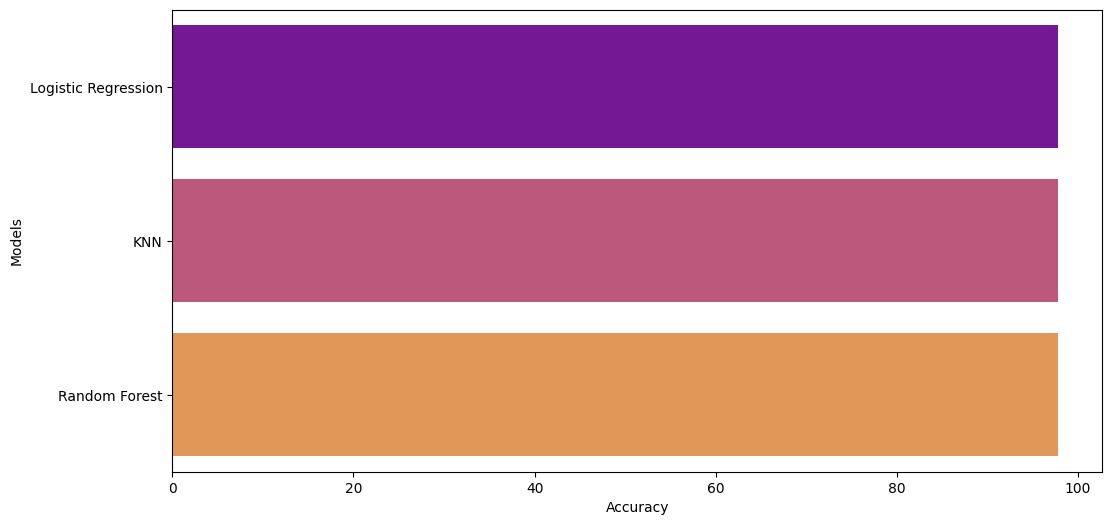

In [29]:
#visualizing the result

plt.figure(figsize=(12,6))
model_acc = [acc_logreg ,acc_knn,acc_rfc]
model_name = ['Logistic Regression','KNN','Random Forest']
plt.xlabel("Accuracy")
plt.ylabel("Models")
sns.barplot(x=model_acc, y=model_name, palette='plasma')

In [30]:
#classification report f0r logistic regression
from sklearn.metrics import classification_report
Y_pred_lor = model3.predict(X_test)
print(classification_report(Y_test, Y_pred_lor))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [31]:
#classification report f0r knn
from sklearn.metrics import classification_report
Y_pred_knn = model2.predict(X_test)
print(classification_report(Y_test, Y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [32]:
#classification report f0r random forest
from sklearn.metrics import classification_report
Y_pred_rf = model1.predict(X_test)
print(classification_report(Y_test, Y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [33]:
#testing the result
print(Y_pred_rf)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']
